<a href="https://colab.research.google.com/github/HilkarSoberanes/Physics/blob/main/OpticaNoLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Datos Experimentales



## Primera corrida

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from google.colab import files
from google.colab import drive

#files.upload()
drive.mount("/content/drive") #Acces My Google Drive

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Laboratorio1/Practica3/Datos/AgNps_2438mW_303A.CSV', names=['datos'])
df[['z','referencia','diafragma','sin_diafragma']] = df['datos'].str.split('\t', 0, expand=True)
df.drop('datos', axis=1, inplace=True)
df['z'] = df['z'].astype(float)
df['referencia'] = df['referencia'].astype(float)
df['diafragma'] = df['diafragma'].astype(float)
df['sin_diafragma'] = df['sin_diafragma'].astype(float)
df['diafragma_normalizado'] = df['diafragma']/df['referencia']
df['sin_diafragma_normalizado']= df['sin_diafragma']/df['referencia']

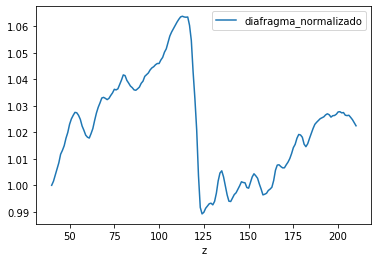

In [4]:
df.plot(x=0, y = 4)

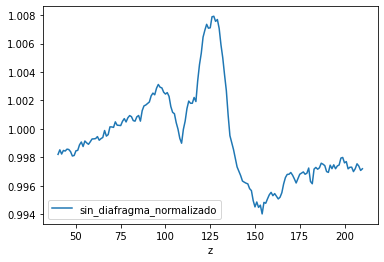

In [5]:
df.plot(x=0,y = 5)

## Cinco corridas

In [6]:
df = pd.read_csv('/content/drive/My Drive/Laboratorio1/Practica3/Datos/AgNps_2438mW_303A_5corridas.CSV', names=['datos'])
df[['z','referencia','diafragma','sin_diafragma']] = df['datos'].str.split('\t', 0, expand=True)
df.drop('datos', axis=1, inplace=True)
df['z'] = df['z'].astype(float)
df['referencia'] = df['referencia'].astype(float)
df['diafragma'] = df['diafragma'].astype(float)
df['sin_diafragma'] = df['sin_diafragma'].astype(float)
df['diafragma_normalizado'] = df['diafragma']/df['referencia']
df['sin_diafragma_normalizado']= df['sin_diafragma']/df['referencia']

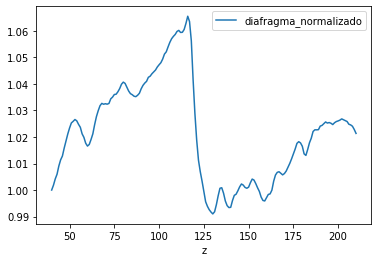

In [7]:
df.plot(x=0,y=4)

In [8]:
df.loc[df['diafragma_normalizado'] == df['diafragma_normalizado'].max()]

,z,referencia,diafragma,sin_diafragma,diafragma_normalizado,sin_diafragma_normalizado
76,116.0,0.712546,0.759239,0.712314,1.065529,0.999674


In [9]:
df.loc[df['diafragma_normalizado'] == df['diafragma_normalizado'].min()]

,z,referencia,diafragma,sin_diafragma,diafragma_normalizado,sin_diafragma_normalizado
90,130.0,0.712706,0.706291,0.716353,0.990999,1.005118


In [10]:
delta_T_pv = abs(df['diafragma_normalizado'].iloc[76] - df['diafragma_normalizado'].iloc[90])
delta_T_pv

0.07453041419336726

In [14]:
s = 0.303
delta_phi = delta_T_pv/(0.406*(1 - s)**(0.25))
delta_phi

0.20090896052017237

In [15]:
z = 1E-3
alpha_0 = 5.712941545
L_eff = (1 - np.exp(-alpha_0*z))/alpha_0
L_eff

0.000997148961084167

In [27]:
'{:.3e}'.format(L_eff)

'9.971e-04'

In [16]:
lambda_ = 800E-9
I_0 = 186352000000
gamma = (lambda_*delta_phi)/(2*np.pi*I_0*L_eff)
gamma

1.3766239661474124e-16

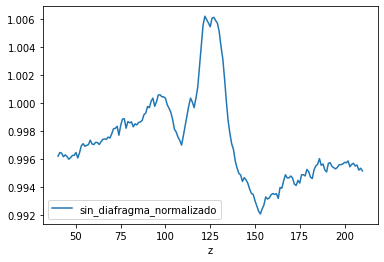

In [24]:
df.plot(x=0, y=5)

In [18]:
df.loc[df['sin_diafragma_normalizado'] == df['sin_diafragma_normalizado'].min()]

,z,referencia,diafragma,sin_diafragma,diafragma_normalizado,sin_diafragma_normalizado
113,153.0,0.713146,0.715831,0.707506,1.003765,0.992091


In [19]:
df.loc[df['sin_diafragma_normalizado'] == df['sin_diafragma_normalizado'].max()]

,z,referencia,diafragma,sin_diafragma,diafragma_normalizado,sin_diafragma_normalizado
82,122.0,0.712385,0.720398,0.716801,1.011248,1.006198


In [20]:
delta_T_0= abs(df['sin_diafragma_normalizado'].iloc[113] - df['sin_diafragma_normalizado'].iloc[82])
delta_T_0

0.014106927797190139

In [21]:
beta = (delta_T_0*2*np.sqrt(2))/(I_0*L_eff)
beta

2.1472535913466943e-10

In [22]:
n_2 = gamma 
n_2

1.3766239661474124e-16

In [23]:
n_2 ='{:.3e}'.format(n_2)

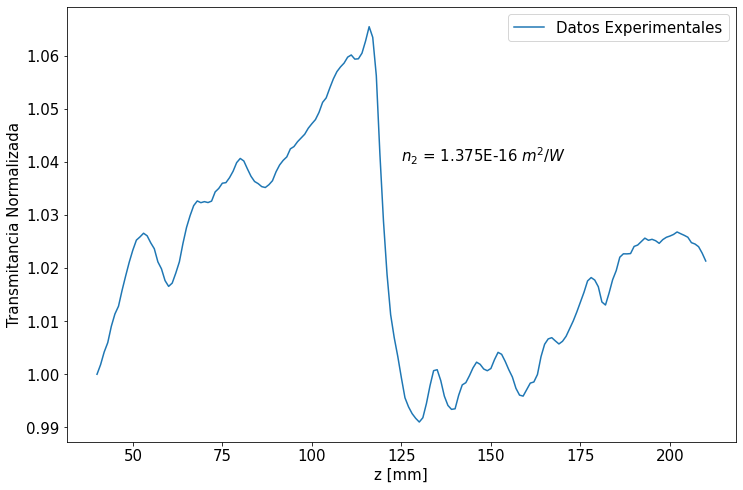

In [25]:
plt.figure(figsize=(12,8))
plt.rc('font',size=15)

plt.plot(df['z'], df['diafragma_normalizado'], label = 'Datos Experimentales')
plt.xlabel('z [mm]')
plt.ylabel('Transmitancia Normalizada')
plt.text(125, 1.04, '$n_2$ = 1.375E-16 $m^{2}/W$' , fontsize = 15)
plt.legend()


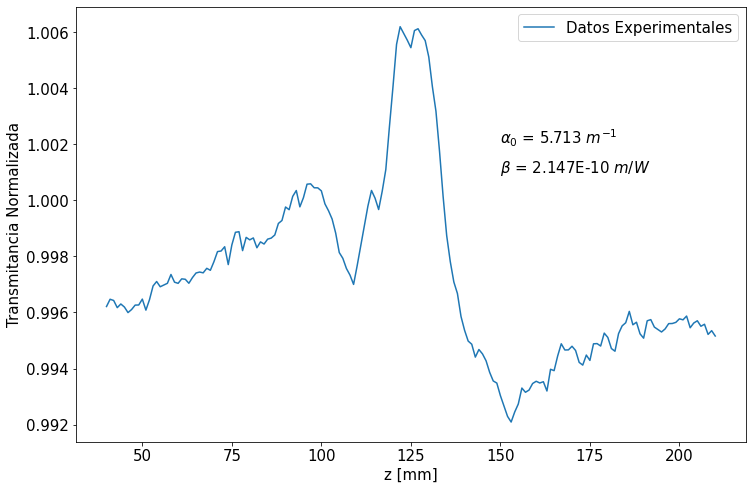

In [26]:
plt.figure(figsize=(12,8))
plt.rc('font',size=15)

plt.plot(df['z'], df['sin_diafragma_normalizado'], label = 'Datos Experimentales')
plt.xlabel('z [mm]')
plt.ylabel('Transmitancia Normalizada')
plt.text(150, 1.002, r'$ \alpha _0$ = 5.713 $m^{-1}$ ', fontsize = 15)
plt.text(150, 1.001, r'$\beta$ = 2.147E-10 $m/W$', fontsize = 15)
plt.legend()